In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv(r'E:\SQL DATA Folder\NY_H_data\NY_HousingData.csv', low_memory=False) 

In [129]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,10.0,NaN,C0,356 E 8 ST,NaN,...,3,0,3,"1,804","2,928",1899.0,1.0,C0,"2,000,000",3/13/2024
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,9.0,NaN,C1,234 E 7TH ST,NaN,...,20,0,20,"2,059","6,490",1900.0,2.0,C1,"5,615,000",5/30/2024
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,54.0,NaN,C4,"719 E 6TH STREET, 4C",NaN,...,20,0,20,"2,302","9,750",1900.0,2.0,C4,"168,494",5/28/2024
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,38.0,NaN,C4,"21 AVENUE C, 2B",NaN,...,20,2,22,"3,315","17,160",1900.0,2.0,C4,"163,587",5/16/2024
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,38.0,NaN,C4,"21 AVENUE C, 4A",NaN,...,20,2,22,"3,315","17,160",1900.0,2.0,C4,"116,848",5/31/2024


In [130]:
ColumnTitles = df.columns.tolist()
print(ColumnTitles)

['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS', 'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS\nAT TIME OF SALE', 'SALE PRICE', 'SALE DATE']


In [131]:
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"], errors='coerce')
print(df["SALE DATE"].head())
print(df["SALE DATE"].dtypes)

0   2024-03-13
1   2024-05-30
2   2024-05-28
3   2024-05-16
4   2024-05-31
Name: SALE DATE, dtype: datetime64[ns]
datetime64[ns]


In [132]:
df.columns = [col.replace('\n', '').strip() for col in df.columns]
df["SALE_MONTH"] = df["SALE DATE"].dt.month
df["SALE_DAY"] = df["SALE DATE"].dt.day
df["SALE_YEAR"] = df["SALE DATE"].dt.year

df["AGE_AT_SALE"] = df["SALE_YEAR"] - df["YEAR BUILT"]

df["SALE PRICE"] = df["SALE PRICE"].astype(str).str.replace(r"[^\d.]", "", regex=True)
df["SALE PRICE"] = pd.to_numeric(df["SALE PRICE"], errors='coerce')
df = df[df["SALE PRICE"] > 1000]
df = df.dropna(subset=["SALE PRICE"])

borough_names = {1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}
df["BOROUGH_NAME"] = df["BOROUGH"].map(borough_names)

In [133]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASSAT TIME OF SALE,SALE PRICE,SALE DATE,SALE_MONTH,SALE_DAY,SALE_YEAR,AGE_AT_SALE,BOROUGH_NAME
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,10.0,NaN,C0,356 E 8 ST,NaN,...,1899.0,1.0,C0,2000000.0,2024-03-13,3.0,13.0,2024.0,125.0,Manhattan
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,9.0,NaN,C1,234 E 7TH ST,NaN,...,1900.0,2.0,C1,5615000.0,2024-05-30,5.0,30.0,2024.0,124.0,Manhattan
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,54.0,NaN,C4,"719 E 6TH STREET, 4C",NaN,...,1900.0,2.0,C4,168494.0,2024-05-28,5.0,28.0,2024.0,124.0,Manhattan
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,38.0,NaN,C4,"21 AVENUE C, 2B",NaN,...,1900.0,2.0,C4,163587.0,2024-05-16,5.0,16.0,2024.0,124.0,Manhattan
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,38.0,NaN,C4,"21 AVENUE C, 4A",NaN,...,1900.0,2.0,C4,116848.0,2024-05-31,5.0,31.0,2024.0,124.0,Manhattan


In [134]:
ColumnTitles = df.columns.tolist()
print(ColumnTitles)

['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASSAT TIME OF SALE', 'SALE PRICE', 'SALE DATE', 'SALE_MONTH', 'SALE_DAY', 'SALE_YEAR', 'AGE_AT_SALE', 'BOROUGH_NAME']


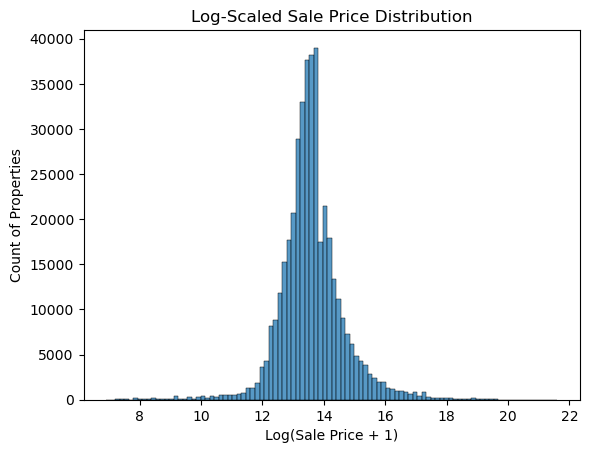

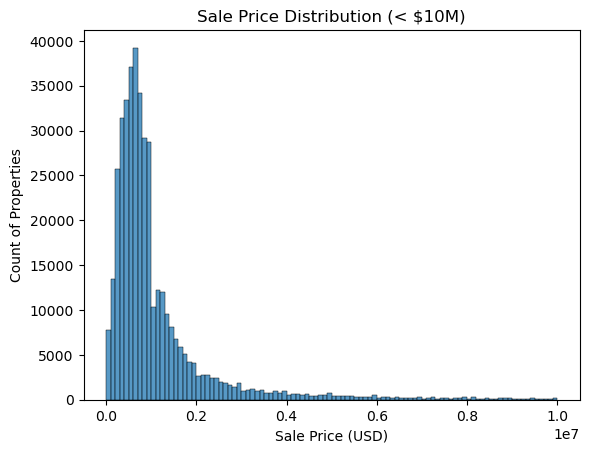

In [135]:
sns.histplot(np.log1p(df["SALE PRICE"]), bins=100)
plt.title("Log-Scaled Sale Price Distribution")
plt.xlabel("Log(Sale Price + 1)")
plt.ylabel("Count of Properties")
plt.show()

filtered = df[df["SALE PRICE"] <= 1e7]
sns.histplot(filtered["SALE PRICE"], bins=100)
plt.title("Sale Price Distribution (< $10M)")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Count of Properties")
plt.show()

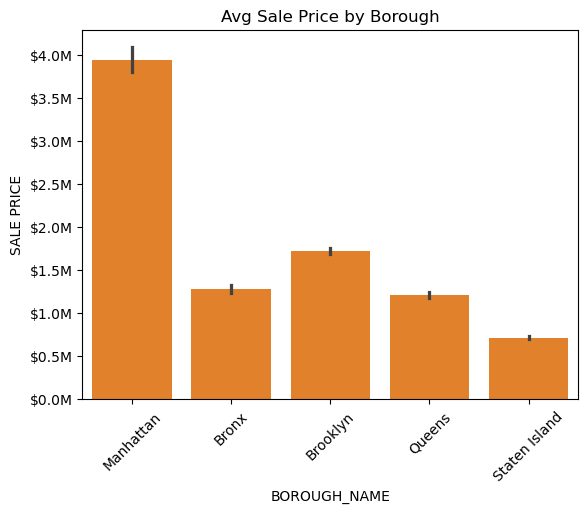

In [136]:
sns.barplot(x="BOROUGH_NAME", y="SALE PRICE", data=df)
plt.xticks(rotation=45)
ax = sns.barplot(x="BOROUGH_NAME", y="SALE PRICE", data=df)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e6:.1f}M"))
plt.title("Avg Sale Price by Borough")
plt.xticks(rotation=45)
plt.show()

In [137]:
#Machine Learning

Root Mean Squared Error: $11,345,712

Feature Importances:
  AGE_AT_SALE: 0.2108
  GROSS SQUARE FEET: 0.4091
  LAND SQUARE FEET: 0.1986
  BOROUGH_ENC: 0.1815


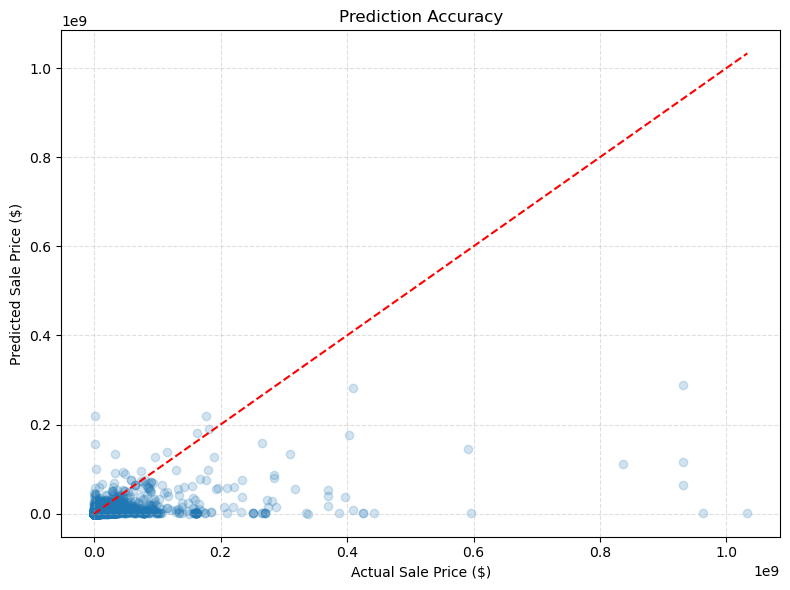

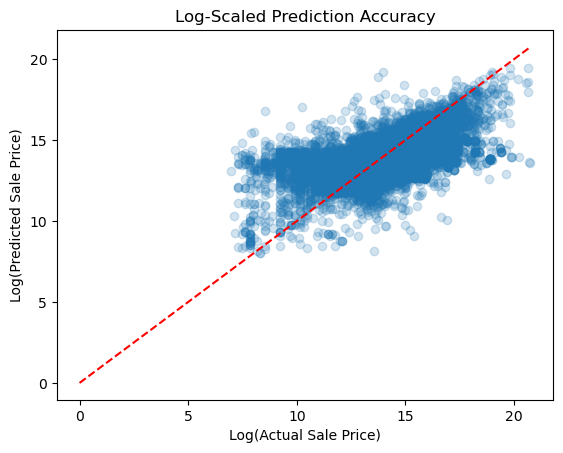

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# ---------------------------
# 1. Fix Boroughs and Other Columns
# ---------------------------
le = LabelEncoder()
df["BOROUGH_ENC"] = le.fit_transform(df["BOROUGH"])

# Remove commas, convert to numeric
for col in ["GROSS SQUARE FEET", "LAND SQUARE FEET"]:
    df[col] = df[col].astype(str).str.replace(",", "")
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ---------------------------
# 2. Feature & Target Selection
# ---------------------------
features = ["AGE_AT_SALE", "GROSS SQUARE FEET", "LAND SQUARE FEET", "BOROUGH_ENC"]
X = df[features].fillna(0)
y = np.log1p(df["SALE PRICE"])

# ---------------------------
# 3. Model Training
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# 4. Evaluation
# ---------------------------
preds = model.predict(X_test)
y_test_exp = np.expm1(y_test)
preds_exp = np.expm1(preds)

rmse = np.sqrt(mean_squared_error(y_test_exp, preds_exp))
print(f"Root Mean Squared Error: ${rmse:,.0f}")

# Feature importance
print("\nFeature Importances:")
for feat, score in zip(features, model.feature_importances_):
    print(f"  {feat}: {score:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_exp, preds_exp, alpha=0.2)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--')
plt.xlabel("Actual Sale Price ($)")
plt.ylabel("Predicted Sale Price ($)")
plt.title("Prediction Accuracy")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

plt.scatter(np.log1p(y_test_exp), np.log1p(preds_exp), alpha=0.2)
plt.plot([0, np.log1p(y_test_exp).max()], [0, np.log1p(y_test_exp).max()], 'r--')
plt.xlabel("Log(Actual Sale Price)")
plt.ylabel("Log(Predicted Sale Price)")
plt.title("Log-Scaled Prediction Accuracy")
plt.show()